In this notebook, I calculate the distortion coefficients of the camera and save them as pickle file to use later in the project.

The code is not able to use 3 of the images because all the 9x6 corners are not visible and not detected.

I then plot the original & distorted images for all the calibration images.

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline  
import glob
import pickle


In [2]:
#Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
images = glob.glob('camera_cal/calibration*.jpg')

nx = 9
ny = 6

objpoints = []
imgpoints = []

objp = np.zeros((nx*ny,3),np.float32)
objp[:,:2] = np.mgrid[0:nx,0:ny].T.reshape(-1,2)

for fname in images:
    img = mpimg.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, (nx,ny), None)
    print(fname,ret)
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)
        img = cv2.drawChessboardCorners(img, (nx,ny), corners, ret)
 
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle.dump( dist_pickle, open( "dist_pickle.p", "wb" ) )

camera_cal/calibration1.jpg False
camera_cal/calibration10.jpg True
camera_cal/calibration11.jpg True
camera_cal/calibration12.jpg True
camera_cal/calibration13.jpg True
camera_cal/calibration14.jpg True
camera_cal/calibration15.jpg True
camera_cal/calibration16.jpg True
camera_cal/calibration17.jpg True
camera_cal/calibration18.jpg True
camera_cal/calibration19.jpg True
camera_cal/calibration2.jpg True
camera_cal/calibration20.jpg True
camera_cal/calibration3.jpg True
camera_cal/calibration4.jpg False
camera_cal/calibration5.jpg False
camera_cal/calibration6.jpg True
camera_cal/calibration7.jpg True
camera_cal/calibration8.jpg True
camera_cal/calibration9.jpg True


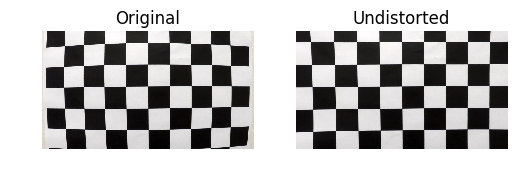

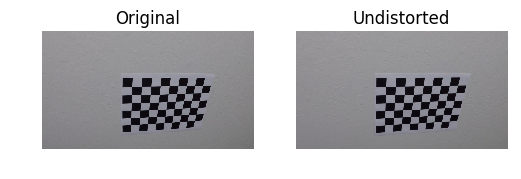

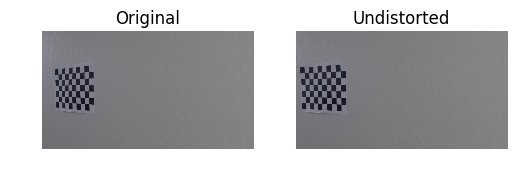

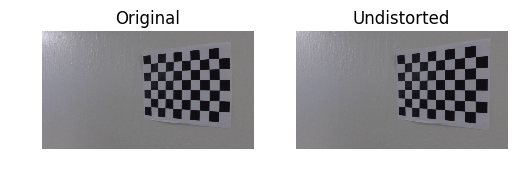

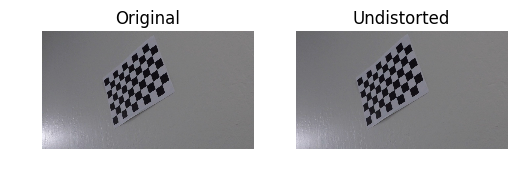

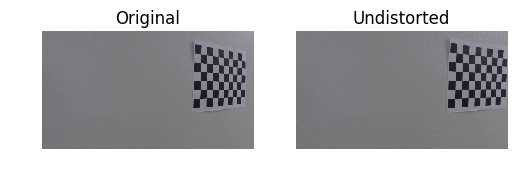

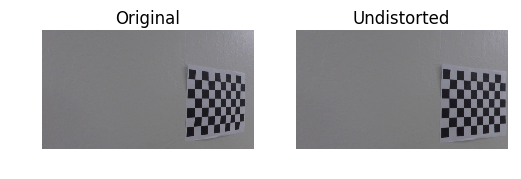

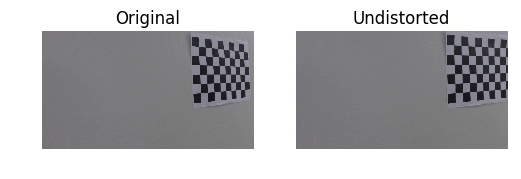

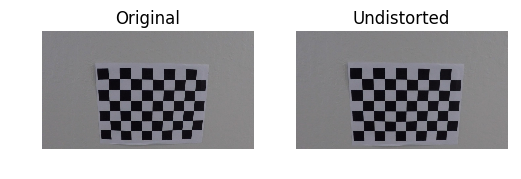

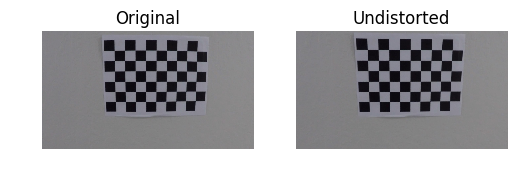

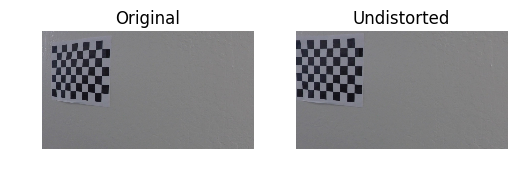

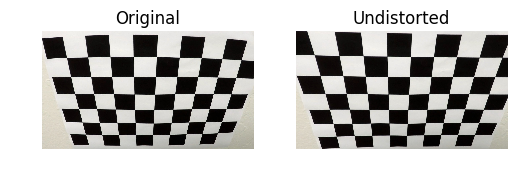

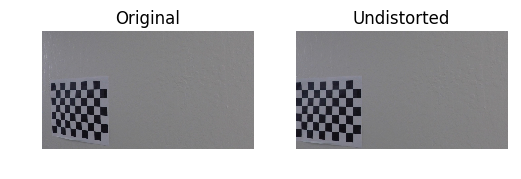

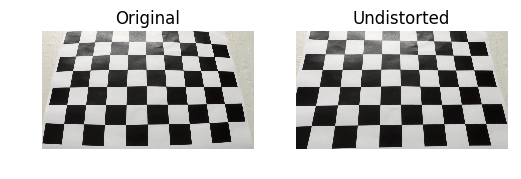

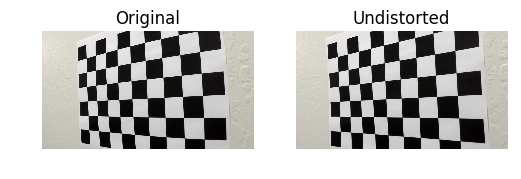

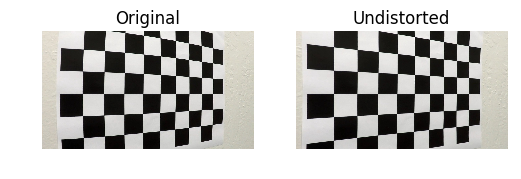

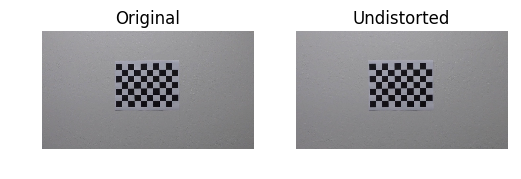

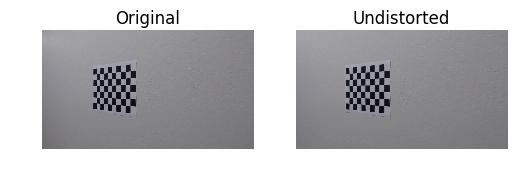

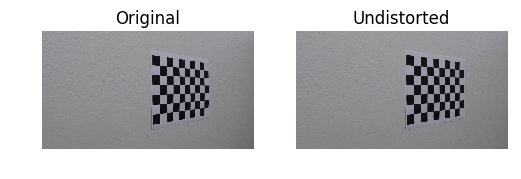

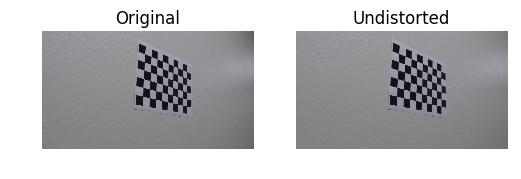

In [3]:
k=1
for fname in images:
    img = mpimg.imread(fname)
    dst = cv2.undistort(img, mtx, dist, None, mtx)

    plt.figure(k)
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title('Original')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(dst)
    plt.title('Undistorted')
    plt.axis('off')
    
    plt.show()

    k=k+1
    